# Quantum Shell Game

Dr. Emre S. Tasci, emre.tasci@hacettepe.edu.tr  
Dept. Eng. Physics  
Hacettepe University  
Ankara / Turkey

June 2024

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$


## Rules & Nomenclature

In this shell game, we have 3 cards, faces down, arranged as Left (L), Middle (M) and Right (R). Their ranks & suits don't matter but their color do (either Black (B) or Red (R)) _(now that it has been put to writing, it is obvious that the cards could be just colored cars! 8P)_. The player wins if their pick matches one of the following pairs:

* LM or RM different colors
* LR same color

So in summary, for the player to win, if one of the picked cards is the middle one, the other's color (L/R) should be different; and if the middle one is not picked, then the picked cards (L&R) must be of the same color.

As a twist to the contrary games, in this case we will not be the player but the casino/house. 8)

So, our conditions for winning are the opposite -- we (the house) win when:

* LM or RM same color
* LR different colors

As there are 3 cards and 2 possibilities for each card, a round will be one of the following $2^3=8$ cases:

|#|L|M|R|House Wins On|Player Wins On|
|---|---|---|---|---|---|
|1|B|B|B|LM,RM|LR|
|2|B|B|R|LR,LM|RM|
|3|B|R|B|---|LM,RM,LR|
|4|B|R|R|LR,RM|LM|
|5|R|B|B|LR,RM|LM|
|6|R|B|R|---|LM,RM,LR|
|7|R|R|B|LR,LM|RM|
|8|R|R|R|LM,RM|LR|

As the game is set & served by the casino (us), they remove the two 100% lose cases (#3 & #6) so the player is limited to the remaining 6.

Checking the situation now, it can be seen that, in each case, the casino has a 2/3 chance of winning while the player has only 1/3. To level the playing field, the stakes are fixed such as:

* If the player wins, house pays \$2
* If the house wins, player pays \$1

so the game is now fair with respect to expected pay-offs:

$$\underbrace{\$2\times\frac{1}{3}}_{\text{Player's}} = \underbrace{\$1\times\frac{2}{3}}_{\text{Casino's}} = \$0.6\bar6$$

### Simulation of a run of games

In [2]:
N = (int)(1E5)

sets = np.array([["B","B","B"],
                 ["B","B","R"],
                 ["B","R","R"],
                 ["R","B","B"],
                 ["R","R","B"],
                 ["R","R","R"]
                ])

num_player_wins = 0

table = {}
for i in range(N):
    # house sets the table
    table_no = np.random.randint(6)
    (table["L"],table["M"],table["R"]) = sets[table_no]
    #print("{:s} | {:s} | {:s}".format(table["L"],table["M"],table["R"]))
    
    # player picks two cards at random
    (C1,C2) = np.random.choice(["L","M","R"],2,replace=False)
    #print(C1,C2)
    
    if((C1 == "M") | (C2 == "M")):
        if(table[C1] != table[C2]):
            # Player wins
            num_player_wins += 1
            #print("Player wins!")
        #else:
            # House wins
            #print("House wins!")

    else:
        if(table[C1] == table[C2]):
            # Player wins
            num_player_wins += 1
            #print("Player wins!")
        #else:
            # House wins
            #print("House wins!")
            
    #print("-"*30)

num_house_wins = N - num_player_wins

print("Total # of player wins: {:d}".format(num_player_wins))
print("Ratio: {:d}/{:d} = {:.5f}".format(num_player_wins,N,
                                         num_player_wins/N))
print("Player's average pay-off: ${:.5f}".format(2*num_player_wins/N))
print("Casino's average pay-off: ${:.5f}".format(num_house_wins/N))

Total # of player wins: 33429
Ratio: 33429/100000 = 0.33429
Player's average pay-off: $0.66858
Casino's average pay-off: $0.66571


## The Game

Now, here comes the unusual part: The player can pick any two card they please alas, instead of revealing the cards, the dealer (working for the casino) just announces their color. Naturally, the player can't trust the dealer, so the casino comes up with this solution and proposes it to the player:

We will set up the table in two identical rooms and there will be no communication between the dealers of each room (let's call them Alice and Bob). You will pick one card from room #1 and another from #2. To ensure that the setups are the same, you can call the same card in both rooms: as is ensured, you will observe that they will always be announced as being of the same color. If, for even one time, your call of the same card is returned with different answers from the dealers, that shows that we were cheating and you'll be paid $1 million (/gazillion dollars, or the universe -- you name it).

```{warning}
Don't forget that Alice and Bob are dealers, not players (and they work for the casino, i.e., us).
```

## Measurement

Since polarization is nothing but the changing of the basis, $R_\theta$ is defined as:

$$R_\theta=\begin{pmatrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{pmatrix}\rightarrow\left\{ \begin{array}{l}
R_{30^o}=\begin{pmatrix}\frac{\sqrt{3}}{{2}}&-\frac{1}{{2}}\\\frac{1}{{2}}&\frac{\sqrt{3}}{{2}}\end{pmatrix}\\
R_{0}=\begin{pmatrix}1&0\\0&1\end{pmatrix}\\
R_{-30^o}=\begin{pmatrix}\frac{\sqrt{3}}{{2}}&\frac{1}{{2}}\\-\frac{1}{{2}}&\frac{\sqrt{3}}{{2}}\end{pmatrix}
\end{array}\right.$$

and its effect on kets $\ket 0$ and $\ket 1$ are:

$$\begin{array}{l}
R_\theta\ket 0 = \begin{pmatrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}=\begin{pmatrix}\cos\theta\\\sin\theta\end{pmatrix}=\cos\theta\ket 0 + \sin\theta\ket 1\\
R_\theta\ket 1 = \begin{pmatrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix}=\begin{pmatrix}\cos\theta\\-\sin\theta\end{pmatrix}=-\sin\theta\ket 0 + \cos\theta\ket 1
\end{array}$$

Alice and Bob utilize the following entangled state:

$$\ket{\Psi} = \frac{1}{\sqrt{2}}\left(\ket{00} + \ket{11}\right)$$

Here, $\ket 0$ state corresponds to calling "red", and $\ket 1$ state corresponds to calling "black".

We can represent the actions of Alice and Bob on their entangled state $\ket \Psi$ as:



$$\begin{align}
&\left(R_{\theta_A}\otimes R_{\theta_B}\right)\ket \Psi
=\left(R_{\theta_A}\otimes R_{\theta_B}\right)\left[\frac{1}{\sqrt 2}\left(\ket{00}+\ket{11}\right)\right]\\
&=\frac{1}{\sqrt 2}\left[\left(R_{\theta_A}\ket{0}\otimes R_{\theta_B}\ket{0}\right)+\left(R_{\theta_A}\ket{1}\otimes R_{\theta_B}\ket{1}\right)\right]\\
&=\frac{1}{\sqrt 2}\left[\begin{matrix}\left(\cos\theta_A\ket0+\sin\theta_A\ket1\right)\otimes\left(\cos\theta_B\ket0+\sin\theta_B\ket1\right)\\
+\left(-\sin\theta_A\ket0+\cos\theta_A\ket1\right)\otimes\left(-\sin\theta_B\ket0+\cos\theta_B\ket1\right)\end{matrix}\right]\\
&=\frac{1}{\sqrt 2}\left[\begin{matrix}\left(
\cos\theta_A\cos\theta_B\ket{00}+\cos\theta_A\sin\theta_B\ket{01}
+\sin\theta_A\cos\theta_B\ket{10}+\sin\theta_A\sin\theta_B\ket{11}
\right)\\
\left(
\sin\theta_A\sin\theta_B\ket{00}-\sin\theta_A\cos\theta_B\ket{01}
-\cos\theta_A\sin\theta_B\ket{10}+\cos\theta_A\cos\theta_B\ket{11}
\right)\end{matrix}\right]\\
&=\frac{1}{\sqrt 2}\left[\begin{matrix}
 \left(\cos\theta_A\cos\theta_B+\sin\theta_A\sin\theta_B\right)\ket{00}\\
+\left(\cos\theta_A\sin\theta_B-\sin\theta_A\cos\theta_B\right)\ket{01}\\
+\left(\sin\theta_A\cos\theta_B-\cos\theta_A\sin\theta_B\right)\ket{10}\\
+\left(\sin\theta_A\sin\theta_B-\cos\theta_A\cos\theta_B\right)\ket{11}
\end{matrix}\right]
=\frac{1}{\sqrt 2}\left[\begin{matrix}
 \cos(\theta_A-\theta_B)\ket{00}\\
-\sin(\theta_A-\theta_B)\ket{01}\\
+\sin(\theta_A-\theta_B)\ket{10}\\
+\cos(\theta_A-\theta_B)\ket{11}
\end{matrix}\right]
=\frac{1}{\sqrt 2}\left[\begin{matrix}
 \cos(\Delta)\ket{00}\\
-\sin(\Delta)\ket{01}\\
+\sin(\Delta)\ket{10}\\
+\cos(\Delta)\ket{11}
\end{matrix}\right]
\end{align}
$$

As can be seen, the probabilities depend on the **difference** of Alice and Bob's polarization angles $(\Delta = \theta_A - \theta_B)$. Also, as the probability is the square of the state in question's coefficent, the sign doesn't matter so $\Delta$ will yield the same probability as that of $(-\Delta)$ for the $\sin$ cases (it has already been taken care of in $\cos$ cases due to $\cos$ being an even function ;). Thus for any predefined $\theta_A$, $\theta_B$ and hence $\Delta$, the probability of Alice and Bob calling the cards the same color will be $\cos^2(\Delta)$ and different will be $\sin^2(\Delta)$. The probabilities of Alice and Bob observing the $\ket 0, \ket 1$ states and calling (red if $\ket 0$ is observed, black if $\ket 1$) colors are given as:

|State|Probability|Alice Calls|Bob Calls|Result|
|---|----|---|---|---|
|$\ket{00}$|$\tfrac{1}{2}\cos^2(\Delta)$|Red|Red|Same|
|$\ket{01}$|$\tfrac{1}{2}\sin^2(\Delta)$|Red|Black|Different|
|$\ket{10}$|$\tfrac{1}{2}\sin^2(\Delta)$|Black|Red|Different|
|$\ket{11}$|$\tfrac{1}{2}\cos^2(\Delta)$|Black|Black|Same|

## The "Actual" Quantum Setup
Alice and Bob agree on the following strategy beforehand:

|Dealer|Player Chooses|Set polarization to:|Measure|if 0, call:|if 1, call|
|---|---|---|---|---|---|
| |L|+30<sup>o</sup>|&rarr;|Red|Black|
|**Alice**|M|0|&rarr;|Red|Black|
| |R|-30<sup>o</sup>|&rarr;|Red|Black|
|<hr>|
| |L|+30<sup>o</sup>|&rarr;|Red|Black|
|**Bob**|M|0|&rarr;|Red|Black|
| |R|-30<sup>o</sup>|&rarr;|Red|Black|

* If the player picks the same card in both rooms (to check the honesty of the game), as $\theta_A=\theta_B\rightarrow \Delta=0$, the probability that they will measure the same value $(\ket{00}$ or $\ket{11})$ is $\cos^2(0)=1=100\%$, so it is guaranteed that Both Alice and Bob will call "Red" (if it is $\ket{00}$) or "Black" (if it is $\ket{11}$) in unison, dispersing any doubts about cheating.

* If the player picks the middle card as one of the cards, then $\Delta=30^o$ and the probability of picking the same colored card will be:
  
  $$\cos^2(30^o) = \left(\frac{\sqrt 3}{2}\right)^2 = \frac{3}{4} = 75\%\quad\text{(House wins)}$$
  
  and the probability of the picked cards being of different colors will be:
  
  $$\sin^2(30^o) = \left(\frac{1}{2}\right)^2 = \frac{1}{4} = 25\%\quad\text{(Player wins)}$$

* If the player picks the edge cards (LR), this will result in $\Delta=60^o$ so the probability of picking the same colored card will be equal to:
  
  $$\cos^2(60^o) = \left(\frac{1}{2}\right)^2 = \frac{1}{4} = 25\%\quad\text{(Player wins)}$$
  
  whereas the probability of the picked cards being of different colors will be: 
  
  $$\sin^2(60^o) = \left(\frac{\sqrt 3}{2}\right)^2 = \frac{3}{4} = 75\%\quad\text{(House wins)}$$

So we see that, instead of the classical edge of $\frac{2}{3}$, the casino actually benefits from a $\frac{3}{4}$ chance of winning. The expected pay-offs for the player and the casino, respectively, are now:

* Player: $\$2\times\frac{1}{4} = \$0.50$
* Casino: $\$1\times\frac{3}{4} = \$0.75$

As opposed to the classical one that the player thinks they are in (Casino = Player = $0.66)

### Simulation of a run of games

In [3]:
N = (int)(1E5)

theta = np.deg2rad(30)

num_player_wins = 0

table = {}
for i in range(N):
    # player picks two cards at random
    (C1,C2) = np.random.choice(["L","M","R"],2,replace=False)
    #print(C1,C2)
    
    flag_M = False
    
    if((C1 == "M") | (C2 == "M")):
        Delta = theta
        flag_M = True
    else:
        Delta = 2*theta
    
    prob_same = np.cos(Delta)**2
    if(np.random.rand()<prob_same):
        cond = "same"
    else:
        cond = "different"
    
    if(((not flag_M) & (cond == "same")) | ((flag_M) & (cond == "different"))):
        num_player_wins += 1
    
num_house_wins = N - num_player_wins

print("Total # of player wins: {:d}".format(num_player_wins))
print("Ratio: {:d}/{:d} = {:.5f}".format(num_player_wins,N,
                                         num_player_wins/N))
print("Player's average pay-off: ${:.5f}".format(2*num_player_wins/N))
print("Casino's average pay-off: ${:.5f}".format(num_house_wins/N))

Total # of player wins: 25177
Ratio: 25177/100000 = 0.25177
Player's average pay-off: $0.50354
Casino's average pay-off: $0.74823


### Is 30<sup>o</sup> optimal?

Due to the "honesty" checks, when the picked cards in the rooms are the same, they should be called in the same color, meaning that $\cos^2(\Delta) = 1$, thus $\Delta = \theta_A - \theta_B = 0\rightarrow \theta_A=\theta_B$.

|Player picks|Prob. Same|Prob. Diff|Player Win Prob.|House Win Prob.|
|---|---|---|---|---|
|LR|$\cos^2(2\theta)$|$\sin^2(2\theta)$|$\cos^2(2\theta)$|$\sin^2(2\theta)$|
|{L,R}M|$\cos^2(\theta)$|$\sin^2(\theta)$|$\sin^2(\theta)$|$\cos^2(\theta)$|

We want to find the $\theta$ value that maximizes the expected pay-off for the house:

$$\frac{1}{3}\sin^2(2\theta) + \frac{2}{3}\cos^2(\theta)$$

or, in other terms, the value that minimizes the expected pay-off for the player:

$$\frac{1}{3}\cos^2(2\theta) + \frac{2}{3}\sin^2(\theta)$$

(As the player picks two card out of three, there is a 1/3 chance that it will be "L & R" and 2/3 chance that one of the cards will be "M")

In [4]:
def f(theta_deg):
    theta = np.deg2rad(theta_deg)
    return (np.cos(2*theta)**2+2*np.sin(theta)**2)/3

In [5]:
res = opt.minimize_scalar(f,bounds=[0,180],
                          tol=1E-12)
print(res)

     fun: 0.24999999999999997
    nfev: 27
     nit: 18
 success: True
       x: 29.999999895933797


Plotting player's expected pay-off graph reveals two things:

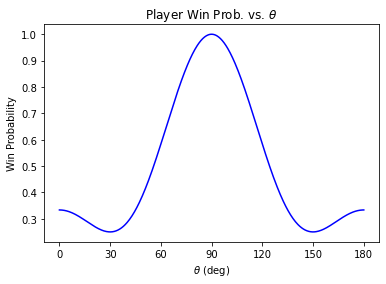

In [6]:
theta = np.linspace(0,180,500)
plt.plot(theta,f(theta),"b-")
plt.xticks(np.arange(0,181,30))
plt.title(r"Player Win Prob. vs. $\theta$")
plt.xlabel(r"$\theta$ (deg)")
plt.ylabel("Win Probability")
plt.show()

First of all, we observe that there are 3 extremum points: at $\theta = 30^o,90^o,150^o$, so $30^o$ is indeed an optimal value for the casino.

More importantly, we see that for $\theta=90^o$, we have a maximum at 1! This means that, no matter which cards the player picks, we (the house) can always ensure that they win!

_But why would we want that?!.._ 8)

## Alternative rules & strategy

As the casino, we could have alternatively put out a reciprocal set of rules:

Player wins when:

* LM or RM: same color
* LR: different colors

Remember the chart of possible games?


|#|L|M|R|Player Wins On|House Wins On|
|---|---|---|---|---|---|
|1|B|B|B|LM,RM|LR|
|2|B|B|R|LR,LM|RM|
|3|B|R|B|---|LM,RM,LR|
|4|B|R|R|LR,RM|LM|
|5|R|B|B|LR,RM|LM|
|6|R|B|R|---|LM,RM,LR|
|7|R|R|B|LR,LM|RM|
|8|R|R|R|LM,RM|LR|

Now, imagine that inviting a player to play with these rules, taking out the two cases (3rd and 6th) where we (the casino/house) are guarenteed to win. With this modification, the player's classical winning chances are 2/3 to our 1/3. We don't even level the field.

Here is how we train our croupiers Alice & Bob:

|Dealer|Player Chooses|Set polarization to:|Measure|if 0, call:|if 1, call|
|---|---|---|---|---|---|
| |L|+90<sup>o</sup>|&rarr;|Red|Black|
|**Alice**|M|0|&rarr;|Red|Black|
| |R|-90<sup>o</sup>|&rarr;|Red|Black|
|<hr>|
| |L|+90<sup>o</sup>|&rarr;|Red|Black|
|**Bob**|M|0|&rarr;|Red|Black|
| |R|-90<sup>o</sup>|&rarr;|Red|Black|

$$\left(R_{\theta_A}\otimes R_{\theta_B}\right)\ket \Psi
=\frac{1}{\sqrt 2}\left[\begin{matrix}
 \cos(\Delta)\ket{00}
-\sin(\Delta)\ket{01}\\
+\sin(\Delta)\ket{10}
+\cos(\Delta)\ket{11}
\end{matrix}\right]$$

with $\theta_A = \theta_B = 90^o$, we have:

* If the player picks the same card in both rooms (to check the honesty of the game), as $\theta_A=\theta_B\rightarrow \Delta=0$, the probability that they will measure the same value $(\ket{00}$ or $\ket{11})$ is $\cos^2(0)=1=100\%$, so it is guaranteed that Alice and Bob will both call "Red" (if it is $\ket{00}$) or "Black" (if it is $\ket{11}$) in unison, dispersing any doubts about cheating.

* If the player picks the middle card as one of the cards, then $\Delta=90^o$ and the probability of picking the same colored card will be:
  
  $$\cos^2(90^o) = 0\quad\text{(Player can never win)}$$
  
  and the probability of the picked cards being of different colors will be:
  
  $$\sin^2(90^o) = 1 = 100\% \quad\text{(House always wins)}$$

* If the player picks the edge cards (LR), this will result in $\Delta=180^o$ so the probability of picking the same colored card will be equal to:
  
  $$\cos^2(180^o) = 1 = 100\% \quad\text{(House always wins)}$$
  
  whereas the probability of the picked cards being of different colors will be: 
  
  $$\sin^2(180^o) = 0 \quad\text{(Player can never win)}$$

So, imagine entering a game where you seemingly have 66.6% chance of winning but instead lose every round!

## Reference
* Gary Oas, Quantum Mechanics, Pre-Collegiate Institute: Quantum Mechanics, [Week 3](https://web.stanford.edu/~oas/SI/QM/notes/SIQMWeek3.pdf), Stanford University.

## Further Reading

A much complex analysis of various "quantum games" is presented in Khesin & Shor's "Simultaneous Measurement and Entanglement" 2022 article. ([DOI: 10.48550/arXiv.2201.10667](https://arxiv.org/abs/2201.10667))

I've attempted to work out all the intermediate calculations in Khesing & Shor's paper along with further comments & explanations ([my version](https://www.cryst.ehu.es/Companion_KS/intro.html)).